# Convert parts of the RVTJ file to and astropy table so it can be compared with a Python model

The RVTJ table contains the positions of the grid celss and other useful information

In [1]:
import os
os.getcwd()

'/Users/matthewsj/winds/release-models/Details/cmfgen/cmfgen'

In [2]:
from astropy.table import Table
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def RVTG_to_table(filename='a3/RVTJ',outroot=''):
    try:
        x=open(filename)
    except:
        print('Could not find ',filename)
        return
    
    lines=x.readlines()
    r=[]
    vel=[]
    temp=[]
    ne=[]
    nh=[]
    i=0
    type='None'
    while i<len(lines):
        if lines[i].count('Radius'):
            type='R'
            i+=1
        elif lines[i].count('Velocity'):
            type='V'
            i+=1
        elif lines[i].count('dlnV/dlnr-1'):
            type='None'
        elif lines[i].count('Electron density'):
            type='ne'
            i+=1
        elif lines[i].count('Temperature'):
            type='T'
            i+=1
        elif lines[i].count('Rosseland Mean Opacity'):
            type='None'
            i+=1
        elif lines[i].count('Hydrogen Density'):
            type='H'
            i+=1
        elif lines[i].count('Helium Density'):
            type='None'
            i+=1
       
        
        if type=='R':
            words=lines[i].split()
            for one in words:
                r.append(eval(one))
        if type=='V':
            words=lines[i].split()
            for one in words:
                vel.append(eval(one))
        if type=='T':
            words=lines[i].split()
            for one in words:
                temp.append(eval(one))
        if type=='ne':
            words=lines[i].split()
            for one in words:
                ne.append(eval(one))
        if type=='H':
            words=lines[i].split()
            for one in words:
                nh.append(eval(one))
        i+=1
        
    
    
    r=np.array(r)
    r*=1e10
    
    vel=np.array(vel)
    vel*=1e5
    
    temp=np.array(temp)
    temp*=1e4
    
    nh=np.array(nh)
    ne=np.array(ne)
    
    z=Table([r,vel,temp,ne,nh],names=['r','v','T','ne','nh'])
    z.sort('r')
    
    z['r'].format='10.3e'
    z['v'].format='10.3e'
    z['T'].format='10.3e'
    z['ne'].format='10.3e'
    z['nh'].format='10.3e'

    if outroot=='':
        outroot='test'
    outname='%s.rvtj.txt' % outroot

    z.write(outname, format='ascii.fixed_width_two_line',overwrite=True)
    
    return outname
        

xname=RVTG_to_table(filename='a3/RVTJ',outroot='a3')
xname=RVTG_to_table(filename='a2/RVTJ',outroot='a2')

In [4]:
z=ascii.read(xname)

In [5]:
z.info()

<Table length=52>
name  dtype 
---- -------
   r float64
   v float64
   T float64
  ne float64
  nh float64


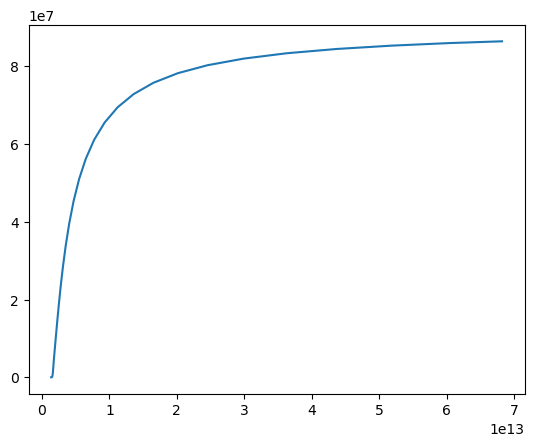

In [6]:
plt.plot(z['r'],z['v'])